### Plot Branin surface

/tmp/ipykernel_1823605/1938796045.py:48: UserWarning: Glyph 7 () missing from font(s) DejaVu Sans.
  plt.savefig(f"branin_{FID}.svg")


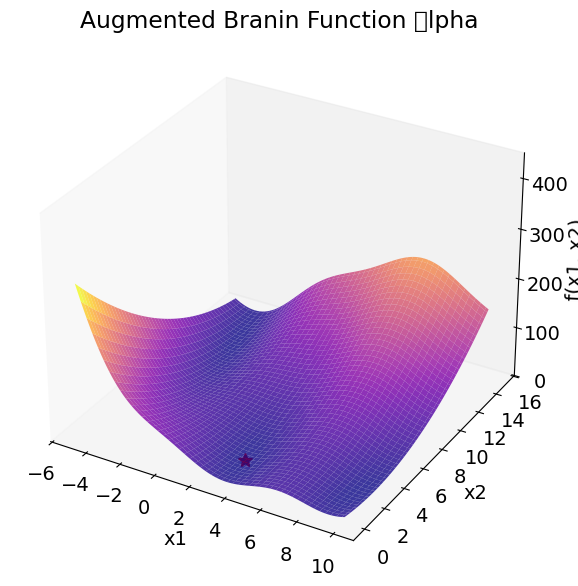

In [14]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from botorch.test_functions import AugmentedBranin

FID = 1
# Step 1: Initialize the Augmented Branin function
aug_branin = AugmentedBranin()
opt = aug_branin.optimal_value

# Step 2: Define a mesh grid for plotting
x1_range = np.linspace(-5, 10.0, 100)  # X1 is scaled between [0, 1] for the Augmented Branin function
x2_range = np.linspace(0, 15.0, 100)  # X2 is scaled between [0, 1]
x1, x2 = np.meshgrid(x1_range, x2_range)

# Step 3: Evaluate the function over the grid
# The Augmented Branin function expects a tensor of shape (n, 2), so we flatten the grid
X_grid = np.column_stack([x1.ravel(), x2.ravel()])
X_tensor = torch.tensor(X_grid, dtype=torch.float32)
X_tensor = torch.cat((X_tensor, FID*torch.ones(X_tensor.shape[0]).unsqueeze(1)), dim=1)

# Evaluate the function
Z = aug_branin(X_tensor).detach().numpy().reshape(x1.shape)

# Step 4: Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
plt.rcParams.update({'font.size': 14})
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x1, x2, Z, cmap='plasma', alpha=0.8)

# Set labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title(f'Augmented Branin Function \alpha')
# Ensure Z axis scale is between 0 and 450
ax.set_zlim(0, 450)
# Set Z axis ticks every 100
ax.set_zticks(np.arange(0, 451, 100))
ax.grid(False)
if FID == 1:
    #ax.plot(-3.141592653589793, 12.275, aug_branin._optimal_value, marker='*', markersize=10, color='r', label="Point")
    ax.plot(3.141592653589793, 2.275, aug_branin._optimal_value, marker='*', markersize=10, color='r', label="Point")
    #ax.plot(9.42478, 2.475, aug_branin._optimal_value, marker='*', markersize=10, color='r', label="Point")

plt.savefig(f"branin_{FID}.svg")
plt.show()


/home/sabanza/Documents/chem-MFBO/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


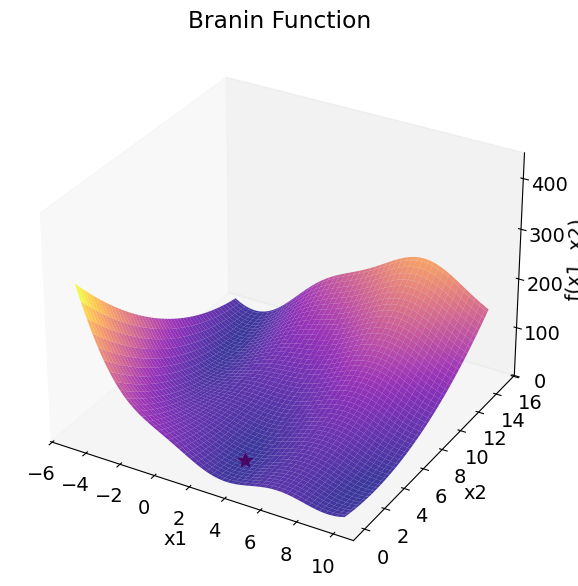

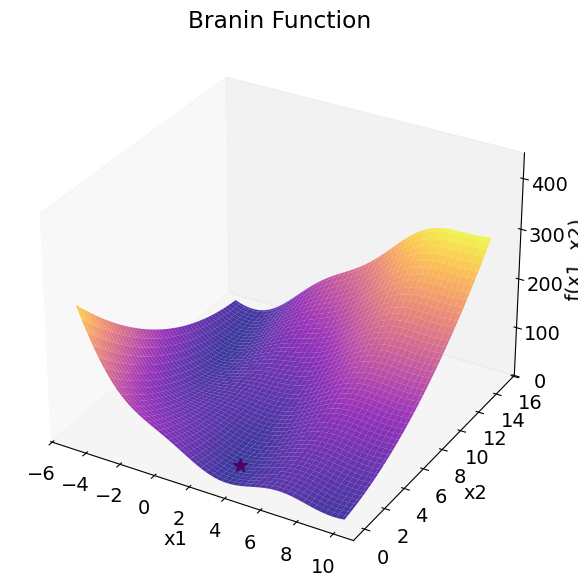

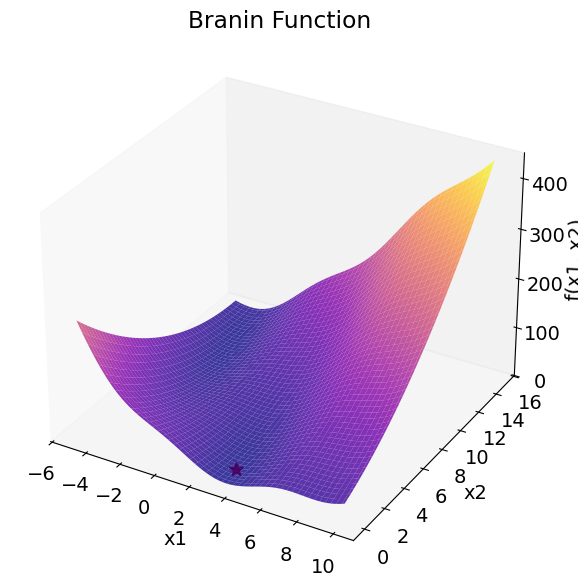

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from botorch.test_functions import AugmentedBranin

FIDS = [1, 0.5, 0.1]

for FID in FIDS:    
    # Step 1: Initialize the Augmented Branin function
    aug_branin = AugmentedBranin()
    opt = aug_branin.optimal_value
    plt.rcParams.update({'font.size': 14})

    # Step 2: Define a mesh grid for plotting
    x1_range = np.linspace(-5, 10.0, 100)  # X1 is scaled between [0, 1] for the Augmented Branin function
    x2_range = np.linspace(0, 15.0, 100)  # X2 is scaled between [0, 1]
    x1, x2 = np.meshgrid(x1_range, x2_range)

    # Step 3: Evaluate the function over the grid
    # The Augmented Branin function expects a tensor of shape (n, 2), so we flatten the grid
    X_grid = np.column_stack([x1.ravel(), x2.ravel()])
    X_tensor = torch.tensor(X_grid, dtype=torch.float32)
    X_tensor = torch.cat((X_tensor, FID*torch.ones(X_tensor.shape[0]).unsqueeze(1)), dim=1)

    # Evaluate the function
    Z = aug_branin(X_tensor).detach().numpy().reshape(x1.shape)

    # Step 4: Plot the 3D surface
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    ax.plot_surface(x1, x2, Z, cmap='plasma', alpha=0.8)

    # Set labels
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1, x2)')
    ax.set_title('Branin Function')
    # Ensure Z axis scale is between 0 and 450
    ax.set_zlim(0, 450)
    # Set Z axis ticks every 100
    ax.set_zticks(np.arange(0, 451, 100))
    ax.grid(False)

    if FID == 1:
        #ax.plot(-3.141592653589793, 12.275, aug_branin._optimal_value, marker='*', markersize=10, color='r', label="Point")
        ax.plot(3.141592653589793, 2.275, aug_branin._optimal_value, marker='*', markersize=10, color='r', label="Point")
        #ax.plot(9.42478, 2.475, aug_branin._optimal_value, marker='*', markersize=10, color='r', label="Point")

    if FID == 0.5:
        ax.plot(np.pi, 1.781519779945532, aug_branin._optimal_value, marker='*', markersize=10, color='r', label="Point")

    if FID == 0.1:
        ax.plot(np.pi, 1.3867356039019576, aug_branin._optimal_value, marker='*', markersize=10, color='r', label="Point")
        
    plt.savefig(f"branin_{FID}.svg")
    plt.show()